<a href="https://colab.research.google.com/github/Dinesh-Je/Weather-Prediction-using-deeplearning/blob/main/Predicting_Natural_Disasters_and_Extreme_Weather_Events_in_South_Asia_Using_a_Hybrid_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***01- Load Libraries and Data***#

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data file from Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Defining dataframe
#
df=pd.read_csv('/content/drive/MyDrive/mscds/Weather_Data.csv', low_memory=False)
print(df.head())

                province   location        date  rainfall  temperature  \
0       Central Province     Matale  11/28/2024     290.4         24.3   
1       Eastern Province     Ampara   5/29/2025      68.1         24.7   
2  Sabaragamuwa Province  Ratnapura   9/28/2023      86.3         21.5   
3  Sabaragamuwa Province  Ratnapura  12/26/2024     227.4         24.5   
4      Southern Province      Galle  10/24/2024     179.6         30.6   

   humidity  wind_speed  river_level  soil_moisture  flood  landslide  
0      73.5        17.3         0.86           51.7      0          1  
1      92.8        19.8         2.87           15.4      0          0  
2      91.9        10.5         4.42           54.8      0          0  
3      69.6         5.3         2.33           54.2      0          1  
4      83.1        17.1         3.08           33.9      0          0  


##***02- Data Cleaning and Preprocessing***##

###2.1 Data Cleansing###

In [37]:
# Display the summary of the data
df.info()

# Get count of missing value
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209200 entries, 0 to 209199
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   province       209200 non-null  object 
 1   location       209200 non-null  object 
 2   date           209200 non-null  object 
 3   rainfall       209200 non-null  float64
 4   temperature    209200 non-null  float64
 5   humidity       209200 non-null  float64
 6   wind_speed     209200 non-null  float64
 7   river_level    209200 non-null  float64
 8   soil_moisture  209200 non-null  float64
 9   flood          209200 non-null  int64  
 10  landslide      209200 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 17.6+ MB


,0
province,0
location,0
date,0
rainfall,0
temperature,0
humidity,0
wind_speed,0
river_level,0
soil_moisture,0
flood,0


In [38]:
#Finding Missing Values
missing_value=df.isnull().sum()

#Print results
print("Missing values in each column:")
if missing_value.sum() == 0:
    print("No missing values found.")
else:
    print(missing_value[missing_value> 0]) #this shows the columns that have missing values

Missing values in each column:
No missing values found.


####2.2 Remove Outliers(IQR Method)###

In [39]:
# List of the columns to remove outliers
feature_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed', 'river_level', 'soil_moisture']

for column in feature_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile Range

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get the original number of rows
    original_rows = len(df)

     # Remove the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Print how many rows were removed
    rows_removed = original_rows - len(df)
    if rows_removed > 0:
        print(f"Removed {rows_removed} outliers from the '{column}' column.")

print("\nOutlier removal complete.")

Removed 485 outliers from the 'rainfall' column.

Outlier removal complete.


###2.3 Min Max Scaling (Scaling 0-1)###

In [40]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

#List of Feature columns
feature_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed', 'river_level', 'soil_moisture']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Initialize the Min-Max scaler
scaler=MinMaxScaler()

# Apply the scaling to the dataframe
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Print the scaled dataframe
print ("Data After Min-MAx scaling (all value are between 0 and 1)")
print(df.head())

Data After Min-MAx scaling (all value are between 0 and 1)
                province   location        date  rainfall  temperature  \
0       Central Province     Matale  11/28/2024  0.641497     0.278317   
1       Eastern Province     Ampara   5/29/2025  0.150434     0.304207   
2  Sabaragamuwa Province  Ratnapura   9/28/2023  0.190638     0.097087   
3  Sabaragamuwa Province  Ratnapura  12/26/2024  0.502329     0.291262   
4      Southern Province      Galle  10/24/2024  0.396739     0.686084   

   humidity  wind_speed  river_level  soil_moisture  flood  landslide  
0     0.470    0.432473     0.034417          0.834      0          1  
1     0.856    0.494976     0.226577          0.108      0          0  
2     0.838    0.262465     0.374761          0.896      0          0  
3     0.392    0.132458     0.174952          0.884      0          1  
4     0.662    0.427472     0.246654          0.478      0          0  


###2.4 Standardization (Z-Score scaling)###

In [41]:
from sklearn.preprocessing import StandardScaler

# List of feature column
feature_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed', 'river_level', 'soil_moisture']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaling to the dataframe
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Print the scaled dataframe
print("Data After Standardization (mean=0 and std=1)")
print(df.head())

Data After Standardization (mean=0 and std=1)
                province   location        date  rainfall  temperature  \
0       Central Province     Matale  11/28/2024  1.462454    -0.779769   
1       Eastern Province     Ampara   5/29/2025 -0.904821    -0.653985   
2  Sabaragamuwa Province  Ratnapura   9/28/2023 -0.711009    -1.660257   
3  Sabaragamuwa Province  Ratnapura  12/26/2024  0.791567    -0.716877   
4      Southern Province      Galle  10/24/2024  0.282544     1.201330   

   humidity  wind_speed  river_level  soil_moisture  flood  landslide  
0 -0.655050   -0.407899    -1.648598       1.681802      0          1  
1  1.200916   -0.145777    -0.740523      -1.313503      0          0  
2  1.114368   -1.120871    -0.040266       1.937599      0          0  
3 -1.030089   -1.666085    -0.984483       1.888090      0          1  
4  0.268125   -0.428869    -0.645649       0.213030      0          0  


###2.5 Imbalance Handling###

In [42]:
# Install the library to handle the imbalance datset
!pip install imbalanced-learn

In [55]:
# Check the original class distribution
# Check the distribution of the target variable in the training set
print("Original training set distribution:")
print(y_train.value_counts())

Original training set distribution:
flood
0    144827
1     22145
Name: count, dtype: int64


###2.6 Spatial Preprocessing###

In [54]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
# Random state ensure the results are reproducible
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data set
# It will return a new imbalanced version of the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- Verification ---
# Check the new, balanced distribution
print("\nResampled training set distribution:")
print(y_train_resampled.value_counts())




Resampled training set distribution:
flood
0    144827
1    144827
Name: count, dtype: int64


###2.7 Geocoding(Convert Names to Coordinates)###

In [50]:
# Insatll the relevant library
!pip install geopy

from geopy.geocoders import Nominatim


data = {'city': ['Ampara','Anuradhapura','Badulla','Batticaloa','Colombo','Galle','Gampaha','Hambantota','Jaffna','Kalutara','Kandy','Kegalle','Kilinochchi','Kurunegala','location','Mannar','Matale','Matara','Monaragala','Mullaitivu','Nuwara Eliya','Polonnaruwa','Puttalam','Ratnapura','Trincomalee','Vavuniya'],
        'province': ['Eastern Province','North Central Province','Uva Province','Eastern Province','Western Province','Southern Province','Western Province','Southern Province','Northern Province','Western Province','Central Province','Sabaragamuwa Province','Northern Province','North Western Province','province','Northern Province','Central Province','Southern Province','Uva Province','Northern Province','Central Province','North Central Province','North Western Province','Sabaragamuwa Province','Eastern Province','Northern Province']}
df = pd.DataFrame(data)

# Initialize the geocoder (Nominatim uses OpenStreetMap data)
geolocator =Nominatim(user_agent="disaster_prediction_app", timeout=10) # Increased timeout to 10 seconds

# Create function to get cordination from city and province
def get_coordinates(row):

    # Create a full location string for more accurate search
    location_query = f"{row['city']}, {row['province']}, Sri Lanka"
    try:
        location = geolocator.geocode(location_query)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None # Return None if location is not found
    except Exception as e:
        print(f"Error geocoding {location_query}: {e}")
        return None, None

# Apply the function to the dataframe to create new coordinate column
# The .apply method goes through each row and runs the function

df[['latitude','longitude']] = df.apply(get_coordinates, axis=1, result_type='expand')

print("Dataframe with new latitude and longitude columns:")
print(df)

Dataframe with new latitude and longitude columns:
            city                province  latitude  longitude
0         Ampara        Eastern Province  7.073758  81.832289
1   Anuradhapura  North Central Province  8.334985  80.410610
2        Badulla            Uva Province  6.990035  81.057031
3     Batticaloa        Eastern Province  7.838102  81.556753
4        Colombo        Western Province  6.938861  79.854201
5          Galle       Southern Province  6.032814  80.214955
6        Gampaha        Western Province  7.119025  79.915988
7     Hambantota       Southern Province  6.124913  81.124256
8         Jaffna       Northern Province  9.665093  80.009303
9       Kalutara        Western Province  6.574530  80.028631
10         Kandy        Central Province  7.293121  80.635036
11       Kegalle   Sabaragamuwa Province  7.113445  80.321740
12   Kilinochchi       Northern Province  9.384007  80.408722
13    Kurunegala  North Western Province  7.487046  80.364908
14      location   

In [51]:
# Assuming the dataframe with coordinates is named 'df' from the previous step
# and the original weather data is in a dataframe that we will reload or assume is available as 'original_df'

# Reload the original data to ensure we have the 'date' column and all original rows
original_df = pd.read_csv('/content/drive/MyDrive/mscds/Weather_Data.csv', low_memory=False)

# Perform outlier removal and scaling again on the original_df to prepare it for merging
# This is necessary because merging might reintroduce rows that were removed during outlier removal on the smaller geocoding dataframe.
# I will copy the outlier removal and scaling code from previous cells.

# List of the columns to remove outliers
feature_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed', 'river_level', 'soil_moisture']

for column in feature_columns:
    Q1 = original_df[column].quantile(0.25)
    Q3 = original_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    original_df = original_df[(original_df[column] >= lower_bound) & (original_df[column] <= upper_bound)]
    # Note: Not printing rows removed here to keep output cleaner

# Apply Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
original_df[feature_columns] = scaler_minmax.fit_transform(original_df[feature_columns])

# Apply Standardization
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
original_df[feature_columns] = scaler_standard.fit_transform(original_df[feature_columns])


# Rename the dataframe with coordinates for clarity before merging
location_coords_df = df[['city', 'province', 'latitude', 'longitude']]
location_coords_df = location_coords_df.rename(columns={'city': 'location'}) # Rename 'city' to 'location' to match original_df


# Merge the original dataframe with the coordinates dataframe
# Merging on 'location' and 'province'
merged_df = pd.merge(original_df, location_coords_df, on=['location', 'province'], how='left')

print("DataFrame after merging with coordinates:")
print(merged_df.head())
print(f"\nShape of the merged DataFrame: {merged_df.shape}")

DataFrame after merging with coordinates:
                province   location        date  rainfall  temperature  \
0       Central Province     Matale  11/28/2024  1.462454    -0.779769   
1       Eastern Province     Ampara   5/29/2025 -0.904821    -0.653985   
2  Sabaragamuwa Province  Ratnapura   9/28/2023 -0.711009    -1.660257   
3  Sabaragamuwa Province  Ratnapura  12/26/2024  0.791567    -0.716877   
4      Southern Province      Galle  10/24/2024  0.282544     1.201330   

   humidity  wind_speed  river_level  soil_moisture  flood  landslide  \
0 -0.655050   -0.407899    -1.648598       1.681802      0          1   
1  1.200916   -0.145777    -0.740523      -1.313503      0          0   
2  1.114368   -1.120871    -0.040266       1.937599      0          0   
3 -1.030089   -1.666085    -0.984483       1.888090      0          1   
4  0.268125   -0.428869    -0.645649       0.213030      0          0   

   latitude  longitude  
0  7.698211  80.660908  
1  7.073758  81.832289  

In [53]:
# Identify categorical columns in the merged dataframe
categorical_cols = ['province', 'location']

# Print columns before attempting to access 'date'
print("Columns in merged_df before date conversion:")
print(merged_df.columns)

# Convert 'date' to datetime and then to a numerical representation (e.g., timestamp)
# Or extract relevant features like year, month, day
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
merged_df['date_timestamp'] = merged_df['date'].astype(np.int64) // 10**9 # Convert to Unix timestamp

# Drop the original 'date' column
merged_df = merged_df.drop('date', axis=1)

# Apply one-hot encoding to categorical columns
merged_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)

print("DataFrame after encoding categorical features and date:")
display(merged_df.head())

from sklearn.model_selection import train_test_split

# Assuming 'flood' is the target variable for this example
X = merged_df.drop(['flood', 'landslide'], axis=1) # Features (excluding both target variables)
y = merged_df['flood'] # Target variable (choose 'flood' or 'landslide')


# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Columns in merged_df before date conversion:
Index(['province', 'location', 'date', 'rainfall', 'temperature', 'humidity',
       'wind_speed', 'river_level', 'soil_moisture', 'flood', 'landslide',
       'latitude', 'longitude'],
      dtype='object')
DataFrame after encoding categorical features and date:


,rainfall,temperature,humidity,wind_speed,river_level,soil_moisture,flood,landslide,latitude,longitude,...,location_Matale,location_Matara,location_Monaragala,location_Mullaitivu,location_Nuwara Eliya,location_Polonnaruwa,location_Puttalam,location_Ratnapura,location_Trincomalee,location_Vavuniya
0,1.462454,-0.779769,-0.655050,-0.407899,-1.648598,1.681802,0,1,7.698211,80.660908,...,True,False,False,False,False,False,False,False,False,False
1,-0.904821,-0.653985,1.200916,-0.145777,-0.740523,-1.313503,0,0,7.073758,81.832289,...,False,False,False,False,False,False,False,False,False,False
2,-0.711009,-1.660257,1.114368,-1.120871,-0.040266,1.937599,0,0,6.579568,80.588223,...,False,False,False,False,False,False,False,True,False,False
3,0.791567,-0.716877,-1.030089,-1.666085,-0.984483,1.888090,0,1,6.579568,80.588223,...,False,False,False,False,False,False,False,True,False,False
4,0.282544,1.201330,0.268125,-0.428869,-0.645649,0.213030,0,0,6.032814,80.214955,...,False,False,False,False,False,False,False,False,False,False



Data split into training and testing sets.
X_train shape: (166972, 41)
y_train shape: (166972,)
X_test shape: (41743, 41)
y_test shape: (41743,)


###2.8 Temporal Alignment###

In [56]:
# Ensure the 'date' column is in datetime format and set it as the index for resampling
# Check if 'date' column exists before proceeding
if 'date' in merged_df.columns:
    merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
    merged_df.set_index('date', inplace=True)

    # Drop rows with NaT in the index that resulted from errors='coerce'
    merged_df.dropna(subset=[merged_df.index.name], inplace=True)


    # For features that should be averaged over the day
    # .mean()calculates the average value each day
    # Select only numeric columns for mean calculation
    df_daily_mean = merged_df.select_dtypes(include=np.number).resample('D').mean()


    # For features that should be summed up over the day
    # .sum() calculates the total rainfall for each day
    # Select only numeric columns for sum calculation
    df_daily_sum = merged_df.select_dtypes(include=np.number).resample('D').sum()

    # Combine the resample data
    # Create a new aligned dataframe
    # We need to ensure the columns 'temperature' and 'rainfall' exist after resampling
    aligned_columns = {}
    if 'temperature' in df_daily_mean.columns:
        aligned_columns['temperature'] = df_daily_mean['temperature']
    if 'rainfall' in df_daily_sum.columns:
         aligned_columns['rainfall'] = df_daily_sum['rainfall']


    df_aligned = pd.DataFrame(aligned_columns)

    # After resampling we may have new gaps(e.g., a day without no data)
    # Good practise to interpolate again to fill them.
    df_aligned.interpolate(method='time', inplace=True)

    # Print the aligned dataframe
    print("Aligned DataFrame:")
    print(df_aligned.head())
else:
    print("Error: 'date' column not found in merged_df.")

Error: 'date' column not found in merged_df.


####2.8.1 Reload the Data to ensure we have the date column####

In [57]:
# Reload the original data to ensure we have the 'date' column and all original rows
original_df = pd.read_csv('/content/drive/MyDrive/mscds/Weather_Data.csv', low_memory=False)

# Perform outlier removal and scaling again on the original_df to prepare it for merging
# This is necessary because merging might reintroduce rows that were removed during outlier removal on the smaller geocoding dataframe.
# I will copy the outlier removal and scaling code from previous cells.

# List of the columns to remove outliers
feature_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed', 'river_level', 'soil_moisture']

for column in feature_columns:
    Q1 = original_df[column].quantile(0.25)
    Q3 = original_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    original_df = original_df[(original_df[column] >= lower_bound) & (original_df[column] <= upper_bound)]
    # Note: Not printing rows removed here to keep output cleaner

# Apply Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
original_df[feature_columns] = scaler_minmax.fit_transform(original_df[feature_columns])

# Apply Standardization
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
original_df[feature_columns] = scaler_standard.fit_transform(original_df[feature_columns])


# Assuming the dataframe with coordinates is named 'df' from cell lzbwpLkJdMG2
# Rename the dataframe with coordinates for clarity before merging
location_coords_df = df[['city', 'province', 'latitude', 'longitude']]
location_coords_df = location_coords_df.rename(columns={'city': 'location'}) # Rename 'city' to 'location' to match original_df


# Merge the original dataframe with the coordinates dataframe
# Merging on 'location' and 'province'
merged_df = pd.merge(original_df, location_coords_df, on=['location', 'province'], how='left')

print("DataFrame after merging with coordinates:")
print(merged_df.head())
print(f"\nShape of the merged DataFrame: {merged_df.shape}")

# --- Temporal Alignment ---
print("\nPerforming Temporal Alignment...")

# Ensure the 'date' column is in datetime format and set it as the index for resampling
# Check if 'date' column exists before proceeding
if 'date' in merged_df.columns:
    merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
    merged_df.set_index('date', inplace=True)

    # Drop rows with NaT in the index
    merged_df.dropna(inplace=True)


    # For features that should be averaged over the day
    # .mean()calculates the average value each day
    # Select only numeric columns for mean calculation
    df_daily_mean = merged_df.select_dtypes(include=np.number).resample('D').mean()


    # For features that should be summed up over the day
    # .sum() calculates the total rainfall for each day
    # Select only numeric columns for sum calculation
    df_daily_sum = merged_df.select_dtypes(include=np.number).resample('D').sum()

    # Combine the resample data
    # Create a new aligned dataframe
    # We need to ensure the columns 'temperature' and 'rainfall' exist after resampling
    aligned_columns = {}
    if 'temperature' in df_daily_mean.columns:
        aligned_columns['temperature'] = df_daily_mean['temperature']
    if 'rainfall' in df_daily_sum.columns:
         aligned_columns['rainfall'] = df_daily_sum['rainfall']


    df_aligned = pd.DataFrame(aligned_columns)

    # After resampling we may have new gaps(e.g., a day without no data)
    # Good practise to interpolate again to fill them.
    df_aligned.interpolate(method='time', inplace=True)

    # Print the aligned dataframe
    print("Aligned DataFrame:")
    print(df_aligned.head())
else:
    print("Error: 'date' column not found in merged_df for temporal alignment.")

DataFrame after merging with coordinates:
                province   location        date  rainfall  temperature  \
0       Central Province     Matale  11/28/2024  1.462454    -0.779769   
1       Eastern Province     Ampara   5/29/2025 -0.904821    -0.653985   
2  Sabaragamuwa Province  Ratnapura   9/28/2023 -0.711009    -1.660257   
3  Sabaragamuwa Province  Ratnapura  12/26/2024  0.791567    -0.716877   
4      Southern Province      Galle  10/24/2024  0.282544     1.201330   

   humidity  wind_speed  river_level  soil_moisture  flood  landslide  \
0 -0.655050   -0.407899    -1.648598       1.681802      0          1   
1  1.200916   -0.145777    -0.740523      -1.313503      0          0   
2  1.114368   -1.120871    -0.040266       1.937599      0          0   
3 -1.030089   -1.666085    -0.984483       1.888090      0          1   
4  0.268125   -0.428869    -0.645649       0.213030      0          0   

   latitude  longitude  
0  7.698211  80.660908  
1  7.073758  81.832289  

In [100]:
# The merged_df contains the original data with spatial information.
# The df_aligned contains the temporally aligned temperature and rainfall data.

# We need to merge df_aligned back with the rest of the features in merged_df.
# Since df_aligned has a DatetimeIndex, we need to make sure merged_df also has a DatetimeIndex.
# We will re-create a merged_df with a DatetimeIndex based on the original data,
# ensuring all original columns are present before merging with df_aligned.

# Reload the original data to ensure we have all columns and the 'date' column
initial_df = pd.read_csv('/content/drive/MyDrive/mscds/Weather_Data.csv', low_memory=False)

# Perform outlier removal and scaling again
feature_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed', 'river_level', 'soil_moisture']
for column in feature_columns:
    Q1 = initial_df[column].quantile(0.25)
    Q3 = initial_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_df = initial_df[(initial_df[column] >= lower_bound) & (initial_df[column] <= upper_bound)].copy() # Use .copy() to avoid SettingWithCopyWarning

scaler_minmax = MinMaxScaler()
initial_df[feature_columns] = scaler_minmax.fit_transform(initial_df[feature_columns])

scaler_standard = StandardScaler()
initial_df[feature_columns] = scaler_standard.fit_transform(initial_df[feature_columns])

# Merge with location coordinates
location_coords_df = df[['city', 'province', 'latitude', 'longitude']].rename(columns={'city': 'location'})
merged_df_with_coords = pd.merge(initial_df, location_coords_df, on=['location', 'province'], how='left')

# Convert 'date' to datetime and set as index for merged_df_with_coords
merged_df_with_coords['date'] = pd.to_datetime(merged_df_with_coords['date'], errors='coerce')
merged_df_with_coords.set_index('date', inplace=True)
merged_df_with_coords.dropna(inplace=True) # Drop rows where date conversion failed

# Now merge merged_df_with_coords with df_aligned on the DatetimeIndex
# Use suffixes to differentiate columns that might have the same name (like 'temperature' and 'rainfall')
# although in this case df_aligned only has these two and they replace the originals.
final_df = merged_df_with_coords.merge(df_aligned[['temperature', 'rainfall']], left_index=True, right_index=True, how='left', suffixes=('_original', '_aligned'))

# Drop the original temperature and rainfall columns as they are replaced by the aligned ones
final_df.drop(columns=['temperature_original', 'rainfall_original'], errors='ignore', inplace=True)

# Rename the aligned columns to the original names
final_df.rename(columns={'temperature_aligned': 'temperature', 'rainfall_aligned': 'rainfall'}, inplace=True)


# --- Encoding and Splitting ---

# # Reset index to make 'date' a column again before encoding other categorical features
# Removed reset_index() to keep DatetimeIndex
# final_df.reset_index(inplace=True)


# Identify categorical columns for encoding (excluding 'location')
categorical_cols_for_encoding = ['province']

# Convert 'date' to numerical representation (timestamp) - it's already datetime from earlier
# We'll create a new column for the timestamp since the index is now the date
final_df['date_timestamp'] = final_df.index.astype(np.int64) // 10**9 # Convert DatetimeIndex to Unix timestamp


# # Drop the original 'date' column
# We will keep the date as the index now
# final_df = final_df.drop('date', axis=1)

# Apply one-hot encoding to specified categorical columns (excluding 'location')
# We need to do this before dropping the original categorical columns if they are not part of the index
# Let's ensure 'province' is not in the index before encoding
if 'province' not in final_df.index.names:
     final_df = pd.get_dummies(final_df, columns=categorical_cols_for_encoding, drop_first=True)
else:
     print("Warning: 'province' is part of the index and will not be one-hot encoded.")

# Ensure 'location' is not dropped if it was not in the index initially and was not encoded
# This check is implicitly handled by not including 'location' in categorical_cols_for_encoding


print("Final DataFrame after incorporating aligned data, encoding (excluding location), and date conversion:")
display(final_df.head())

from sklearn.model_selection import train_test_split

# Assuming 'flood' is the target variable for this example
# Ensure 'location' is not dropped from X if you want to keep it as a feature (though it's not numerical/encoded)
# It's usually better to exclude non-numerical/non-encoded features from X for most models.
# Let's exclude both target variables and the original 'location' column from features X
X = final_df.drop(['flood', 'landslide', 'location'], axis=1, errors='ignore') # Features (excluding targets and original location)
y = final_df['flood'] # Target variable (choose 'flood' or 'landslide')


# Split data into training and testing sets (80% train, 20% test)
# When splitting with a DatetimeIndex, train_test_split preserves the index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Final DataFrame after incorporating aligned data, encoding (excluding location), and date conversion:


,location,humidity,wind_speed,river_level,soil_moisture,flood,landslide,latitude,longitude,temperature,rainfall,date_timestamp,province_Eastern Province,province_North Central Province,province_North Western Province,province_Northern Province,province_Sabaragamuwa Province,province_Southern Province,province_Uva Province,province_Western Province
date,,,,,,,,,,,,,,,,,,,,
2024-11-28,Matale,-0.655050,-0.407899,-1.648598,1.681802,0,1,7.698211,80.660908,-0.199467,130.578275,1732752000,False,False,False,False,False,False,False,False
2025-05-29,Ampara,1.200916,-0.145777,-0.740523,-1.313503,0,0,7.073758,81.832289,-0.306416,118.145269,1748476800,True,False,False,False,False,False,False,False
2023-09-28,Ratnapura,1.114368,-1.120871,-0.040266,1.937599,0,0,6.579568,80.588223,-0.390564,88.487322,1695859200,False,False,False,False,True,False,False,False
2024-12-26,Ratnapura,-1.030089,-1.666085,-0.984483,1.888090,0,1,6.579568,80.588223,-0.137753,88.056639,1735171200,False,False,False,False,True,False,False,False
2024-10-24,Galle,0.268125,-0.428869,-0.645649,0.213030,0,0,6.032814,80.214955,-0.327496,84.122528,1729728000,False,False,False,False,False,True,False,False



Data split into training and testing sets.
X_train shape: (166972, 17)
y_train shape: (166972,)
X_test shape: (41743, 17)
y_test shape: (41743,)


##***03- Exploratory Data Analysis (EDA)***##

###3.1 Univariate Analysis:Understanding Individual Features###

####A. For Continuous Variables####

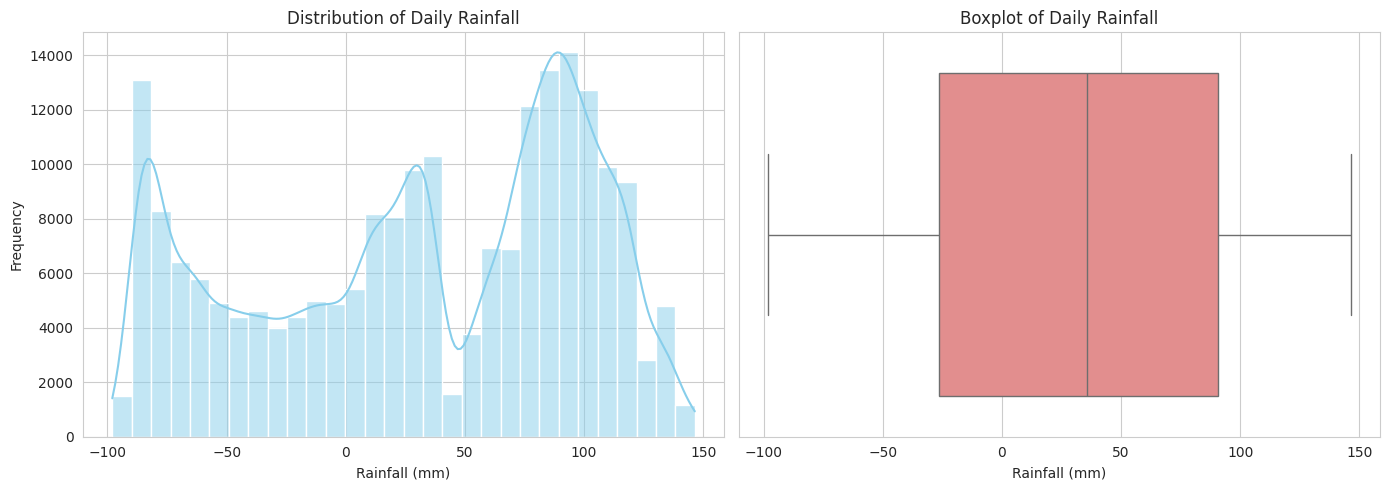

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set then style for the plots
sns.set_style("whitegrid")

# Analyze the distribution of rainfall
plt.figure(figsize=(14, 5))

#Histogram: Show frequency of different rain fall values
plt.subplot(1, 2, 1)
sns.histplot(final_df['rainfall'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Daily Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

# Boxplot: Show the meadian, quartile and outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=final_df['rainfall'], color='lightcoral')
plt.title('Boxplot of Daily Rainfall')
plt.xlabel('Rainfall (mm)')

plt.tight_layout()
plt.show()

####B. Categorical Variables####

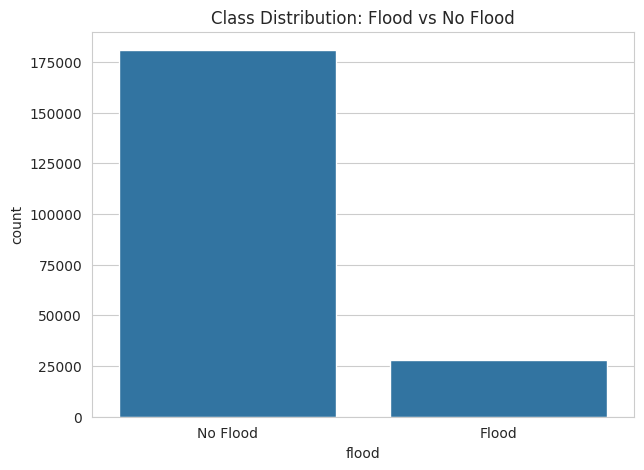

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(x='flood', data=final_df)
plt.title('Class Distribution: Flood vs No Flood')
plt.xticks([0,1],['No Flood','Flood'])
plt.show()

###3.2 Bivariate Analysis:Exploring Relationship between features###

####A. Correlation Matrix and Heatmap####

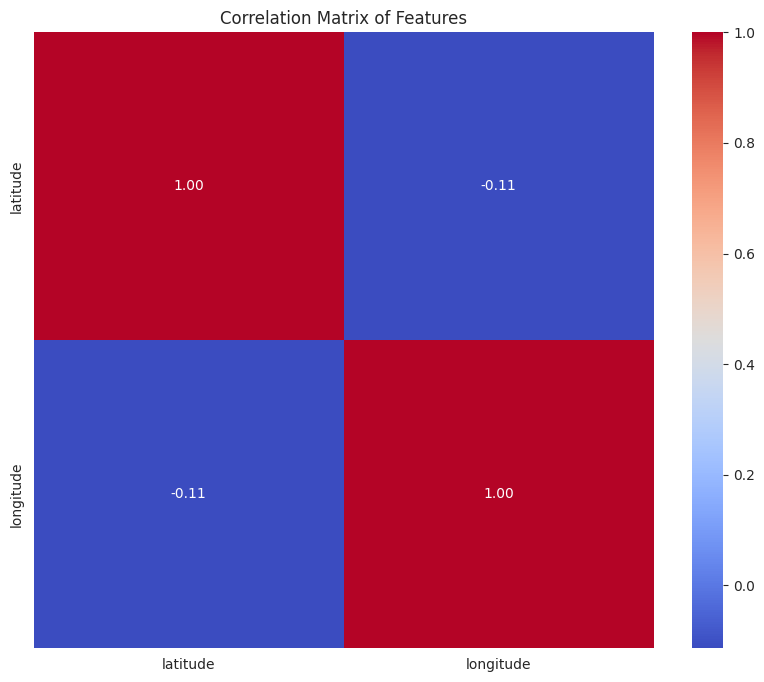

In [61]:
# Select only the numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

###3.3 Time-Series Analysis:Uncovering Temporal Patterns###

#####A. Plotting Features Over Time#####

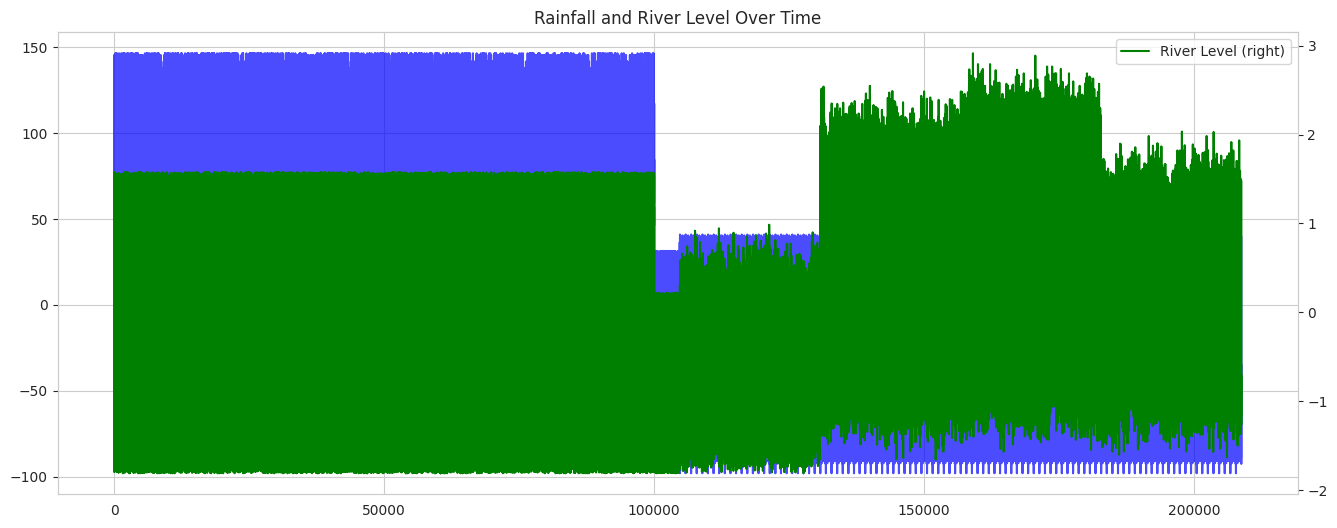

In [64]:
# Plot rainfall and river level over time
plt.figure(figsize=(16, 6))
final_df['rainfall'].plot(label='Daily Rainfall', color='blue', alpha=0.7)
final_df['river_level'].plot(label='River Level', color='green', secondary_y=True) # Plot on a secondary y-axis
plt.title('Rainfall and River Level Over Time')
plt.legend()
plt.show()

#####B. Resampling for Broader Trends#####

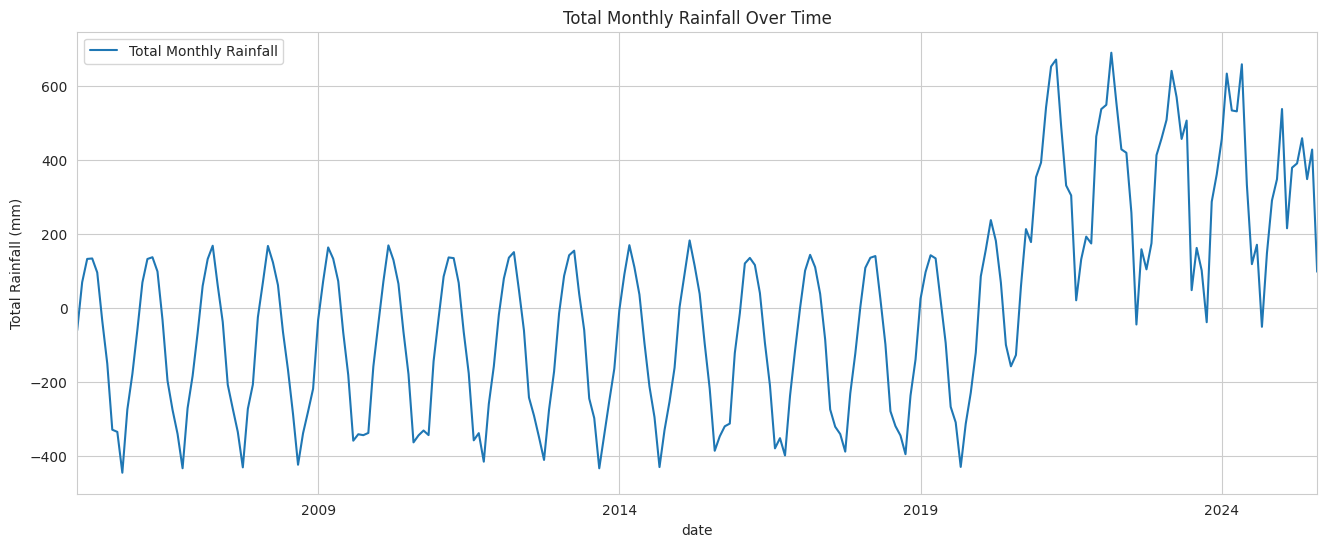

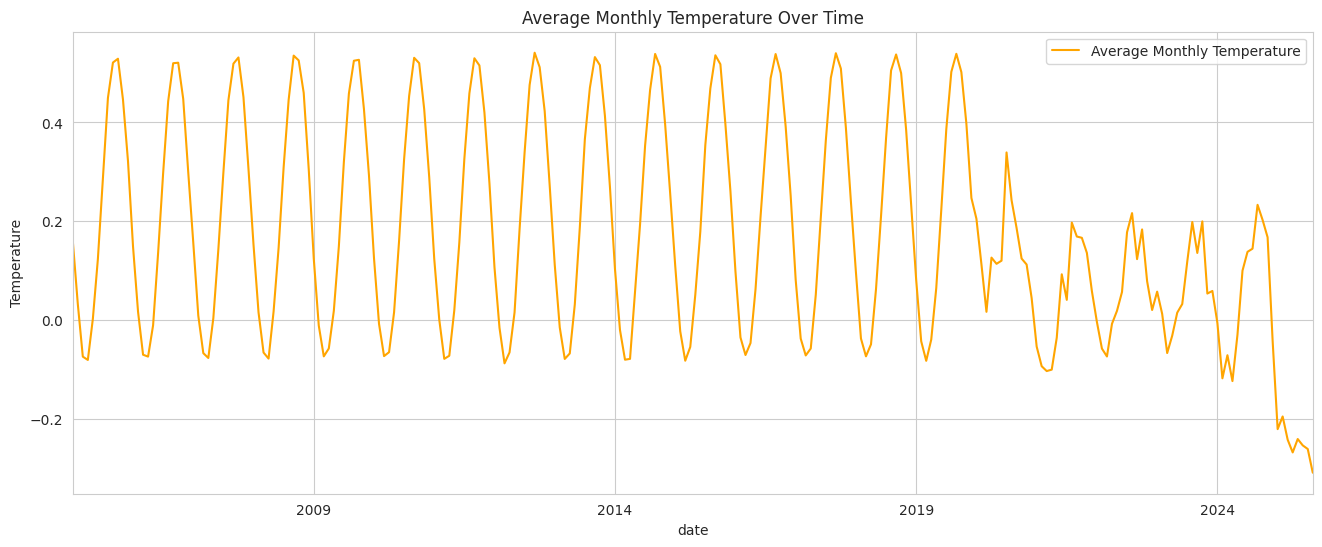

In [68]:
# Resample to get the total monthly rainfall and average monthly temperature
monthly_rainfall = df_aligned['rainfall'].resample('ME').sum()
monthly_temp = df_aligned['temperature'].resample('ME').mean()

# Plot the monthly data
plt.figure(figsize=(16, 6))
monthly_rainfall.plot(label='Total Monthly Rainfall')
plt.title('Total Monthly Rainfall Over Time')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.show()

# Plot the monthly temperature data
plt.figure(figsize=(16, 6))
monthly_temp.plot(label='Average Monthly Temperature', color='orange')
plt.title('Average Monthly Temperature Over Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

###3.4 Statistical Analysis###

#####A.Trend Analysis: Identifying Long-Term Pattern#####

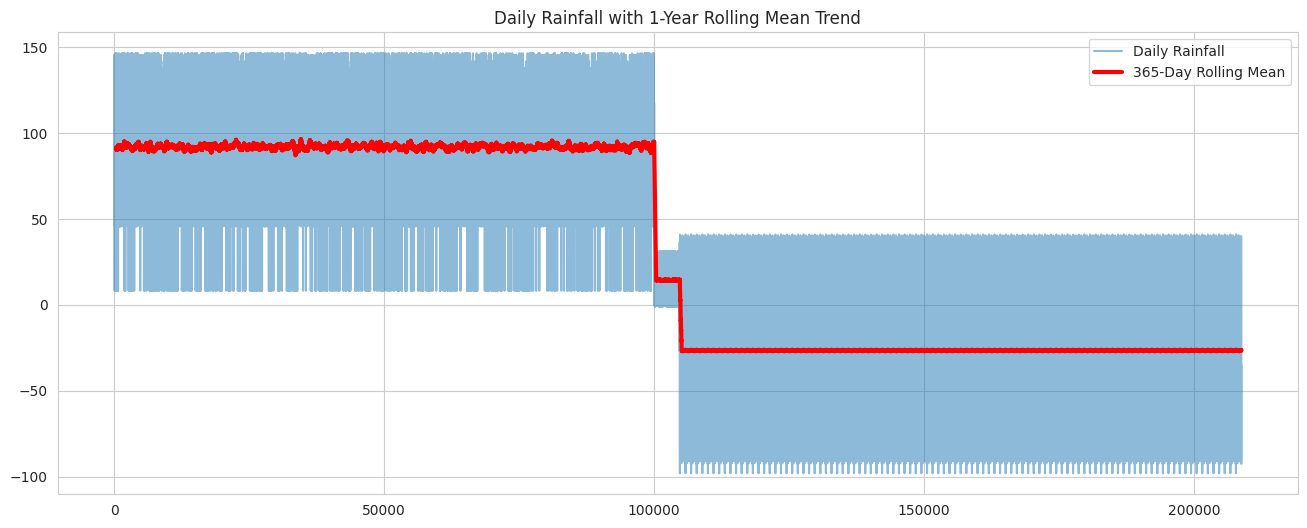

In [71]:
# Calculate the 365-day rolling average for rainfall to see the annual trend
final_df['rainfall_rolling_mean'] = final_df['rainfall'].rolling(window=365).mean()

# Plot the original daily data against the rolling mean trend line
plt.figure(figsize=(16, 6))
final_df['rainfall'].plot(alpha=0.5, label='Daily Rainfall')
final_df['rainfall_rolling_mean'].plot(label='365-Day Rolling Mean', color='red', linewidth=3)

plt.title('Daily Rainfall with 1-Year Rolling Mean Trend')
plt.legend()
plt.show()

#####B. Seasonal Decomposition#####

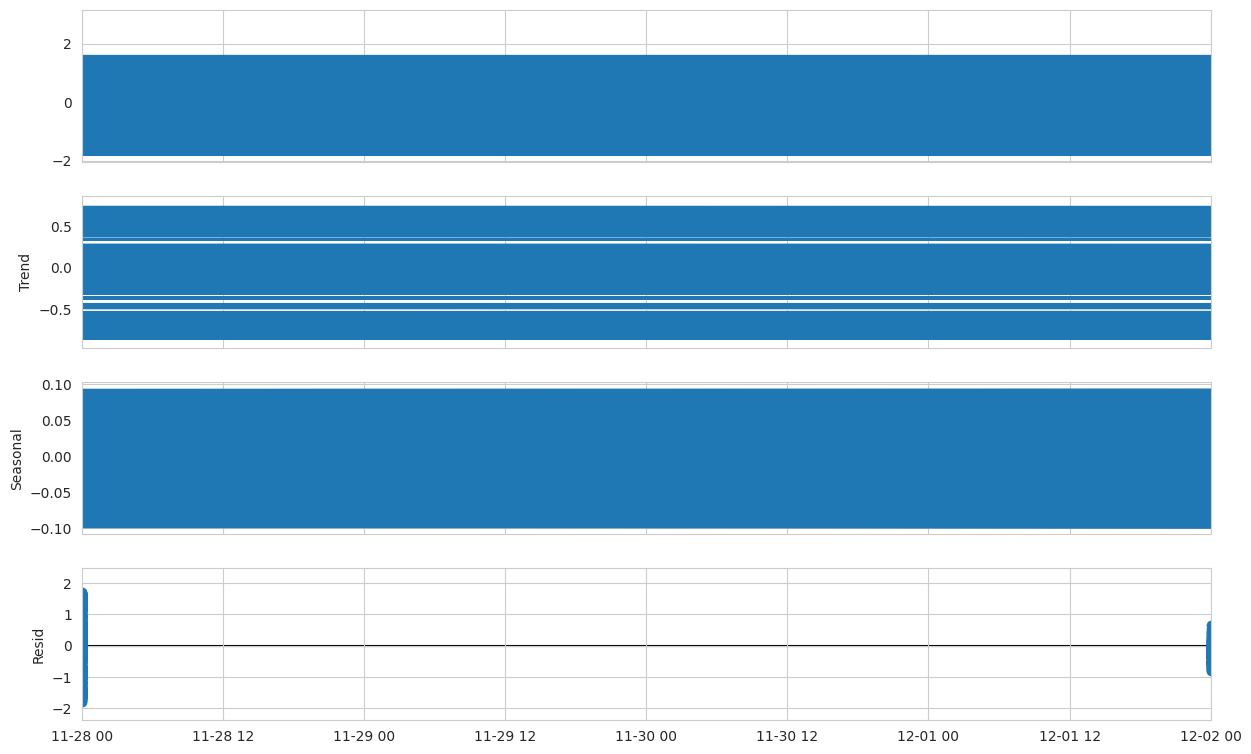

In [86]:
# Need to install the statsmodels library first
!pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd # Import pandas

# Create a Series with DatetimeIndex from final_df for decomposition
# Convert 'date_timestamp' to datetime and set it as the index
river_level_series = pd.Series(final_df['river_level'].values,
                               index=pd.to_datetime(final_df['date_timestamp'], unit='s'))


# Perform seasonal decomposition on the river level data
# We specify period=365 for annual seasonality
# This analysis requires a fairly complete time series, so we fill any remaining NaNs
decomposition = seasonal_decompose(river_level_series.ffill(),
                                 model='additive',
                                 period=365)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

#####C. Correlation Analysis: Quantifying the Rainfall-Flood Relationship#####

In [89]:
from scipy.stats import pointbiserialr
import pandas as pd # Import pandas if not already imported

# Ensure there are no missing values in the columns being tested
# Use final_df which contains the preprocessed data and target variables
# Assuming 'flood' is the target variable for this correlation
clean_df = final_df[['rainfall', 'flood']].dropna().copy() # Use .copy() to avoid SettingWithCopyWarning


# Calculate the Point-Biserial correlation
# The pointbiserialr function expects the binary variable first, then the continuous variable
correlation, p_value = pointbiserialr(clean_df['flood'], clean_df['rainfall'])


print(f"--- Rainfall and Flood Correlation ---")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Interpret the correlation coefficient
if abs(correlation) >= 0.7:
    print("There is a strong correlation.")
elif abs(correlation) >= 0.3:
    print("There is a moderate correlation.")
elif abs(correlation) >= 0.1:
    print("There is a weak correlation.")
else:
    print("There is a very weak or no correlation.")

--- Rainfall and Flood Correlation ---
Correlation Coefficient: 0.1258
P-value: 0.0000
The correlation is statistically significant (p < 0.05).
There is a weak correlation.


###3.5 Visualization###

#####A. Anomaly Detection: Identifying Unusual Events#####

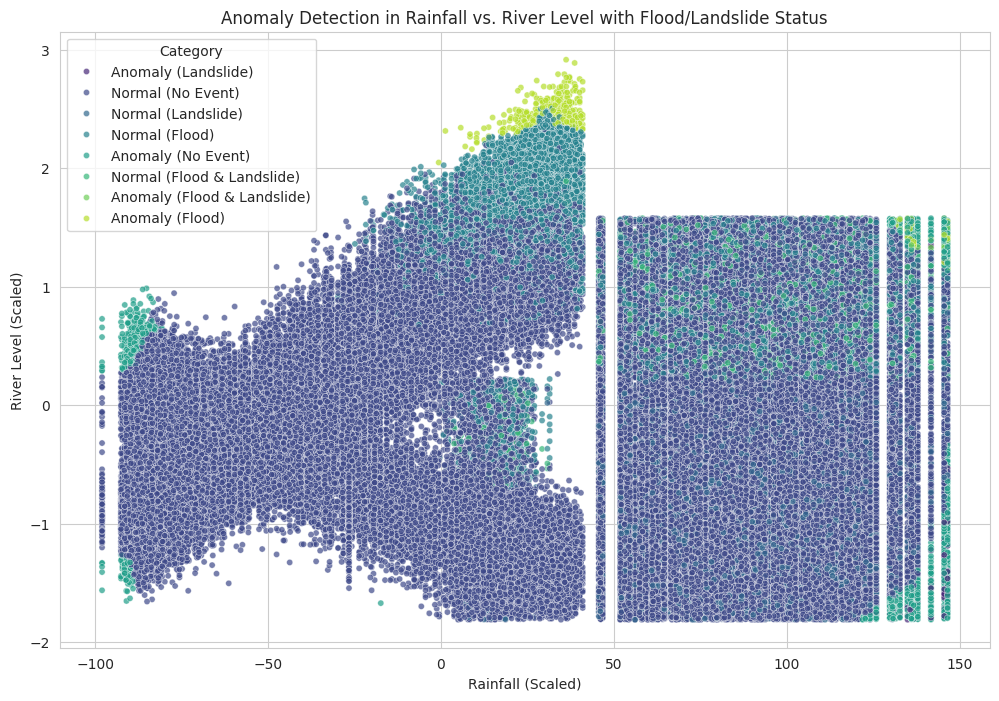

In [96]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features you want to use to find anomalies
features_for_anomaly = ['rainfall', 'river_level']
df_anomaly = final_df[features_for_anomaly].dropna().copy() # Use .copy() to avoid SettingWithCopyWarning

# Initialize the Isolation Forest model
# 'contamination' is the expected proportion of outliers in the data (e.g., 1%)
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to the data
model.fit(df_anomaly)

# Predict which points are anomalies and get anomaly scores
df_anomaly['anomaly_score'] = model.decision_function(df_anomaly)
# Pass only the original features used for fitting to predict
df_anomaly['anomaly'] = model.predict(df_anomaly[features_for_anomaly])


# Merge the anomaly results back to the original final_df based on the index
# Ensure indexes are aligned
final_df_with_anomaly = final_df.copy()
final_df_with_anomaly['anomaly'] = df_anomaly['anomaly']
final_df_with_anomaly['anomaly_score'] = df_anomaly['anomaly_score']


# Create a new column to represent anomaly type combined with flood/landslide status
# -1: Anomaly, 1: Normal
# 0: No Flood/No Landslide, 1: Flood, 1: Landslide
def categorize_anomaly(row):
    if row['anomaly'] == -1:
        if row['flood'] == 1 and row['landslide'] == 1:
            return 'Anomaly (Flood & Landslide)'
        elif row['flood'] == 1:
            return 'Anomaly (Flood)'
        elif row['landslide'] == 1:
            return 'Anomaly (Landslide)'
        else:
            return 'Anomaly (No Event)'
    else:
        if row['flood'] == 1 and row['landslide'] == 1:
             return 'Normal (Flood & Landslide)'
        elif row['flood'] == 1:
            return 'Normal (Flood)'
        elif row['landslide'] == 1:
            return 'Normal (Landslide)'
        else:
            return 'Normal (No Event)'

final_df_with_anomaly['anomaly_category'] = final_df_with_anomaly.apply(categorize_anomaly, axis=1)


# Visualize the results using the new anomaly_category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rainfall', y='river_level', data=final_df_with_anomaly, hue='anomaly_category',
                palette='viridis', alpha=0.7, s=20) # Adjust palette and size as needed
plt.title('Anomaly Detection in Rainfall vs. River Level with Flood/Landslide Status')
plt.xlabel('Rainfall (Scaled)') # Update label to reflect scaled data
plt.ylabel('River Level (Scaled)') # Update label to reflect scaled data
plt.legend(title='Category')
plt.grid(True)
plt.show()

###3.6 Class Analysis###

#####A.Balance between disaster vs non-disaster periods (Flood vs Non Flood)#####

Class Distribution for 'flood':
flood
0    180828
1     27887
Name: count, dtype: int64

Class Distribution (%) for 'flood':
flood
0    86.638718
1    13.361282
Name: proportion, dtype: float64


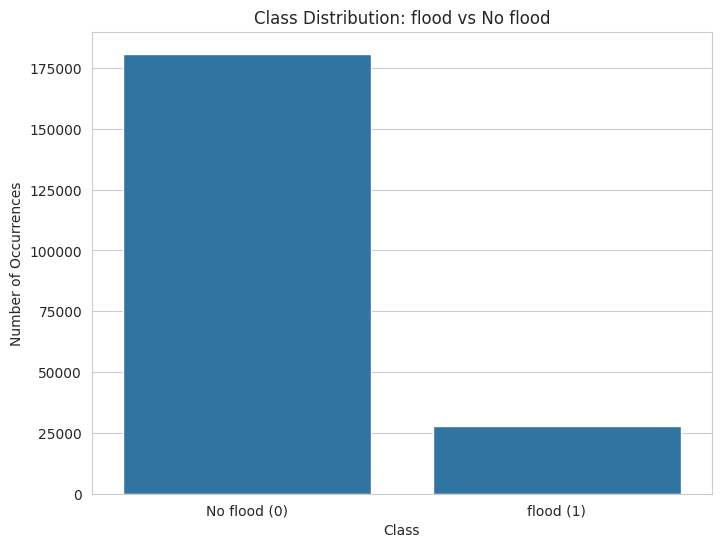

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use final_df which contains the 'flood' and 'landslide' columns
# Assuming you want to see the distribution of the 'flood' variable
target_column = 'flood'

# --- 1. Get the exact counts of each class ---
# Use final_df to get the counts
class_counts = final_df[target_column].value_counts()
print(f"Class Distribution for '{target_column}':")
print(class_counts)

# --- 2. Calculate the percentage ---
# Use final_df to calculate the percentage
class_percentage = final_df[target_column].value_counts(normalize=True) * 100
print(f"\nClass Distribution (%) for '{target_column}':")
print(class_percentage)


# --- 3. Visualize the distribution ---
plt.figure(figsize=(8, 6))
# Use final_df for plotting
sns.countplot(x=target_column, data=final_df)
plt.title(f'Class Distribution: {target_column} vs No {target_column}')
plt.xticks([0, 1], [f'No {target_column} (0)', f'{target_column} (1)']) # Add clear labels
plt.ylabel('Number of Occurrences')
plt.xlabel('Class')
plt.show()

#####B.Balance between disaster vs non-disaster periods (Landslide vs No Landslide)#####

Class Distribution for 'landslide':
landslide
0    195449
1     13266
Name: count, dtype: int64

Class Distribution (%) for 'landslide':
landslide
0    93.643964
1     6.356036
Name: proportion, dtype: float64


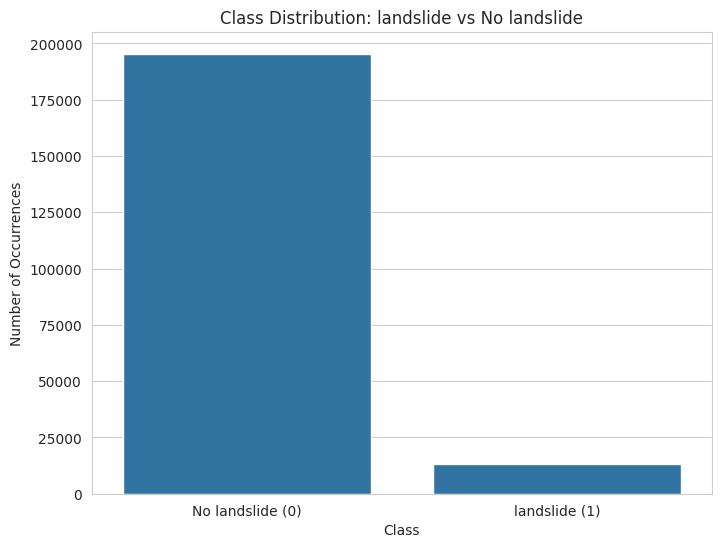

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use final_df which contains the 'flood' and 'landslide' columns
# Assuming you want to see the distribution of the 'landslide' variable
target_column = 'landslide'

# --- 1. Get the exact counts of each class ---
# Use final_df to get the counts
class_counts = final_df[target_column].value_counts()
print(f"Class Distribution for '{target_column}':")
print(class_counts)

# --- 2. Calculate the percentage ---
class_percentage = final_df[target_column].value_counts(normalize=True) * 100
print(f"\nClass Distribution (%) for '{target_column}':")
print(class_percentage)


# --- 3. Visualize the distribution ---
plt.figure(figsize=(8, 6))
# Use final_df for plotting
sns.countplot(x=target_column, data=final_df)
plt.title(f'Class Distribution: {target_column} vs No {target_column}')
plt.xticks([0, 1], [f'No {target_column} (0)', f'{target_column} (1)']) # Add clear labels
plt.ylabel('Number of Occurrences')
plt.xlabel('Class')
plt.show()